<h1>Importing the Data</h1>

<p>In this section, I import the master data set of all 14,130 fights from 3/11/1994 to 04/15/2023.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
all_data = pd.read_csv('data/masterMLpublic.csv')
all_data

,date,fight_url,event_url,result,title_fight,fighter,opponent,stance,dob,division,...,precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_peak_vs_opp,precomp_change_recent_avg_ground_strikes_landed_per_min_differential_vs_valley_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp,precomp_change_avg_ground_strikes_attempts_per_min_differential_vs_valley_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_peak_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_valley_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_vs_peak_vs_opp,precomp_change_recent_avg_ground_strikes_attempts_per_min_differential_vs_valley_vs_opp
0,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,0.0,sean daugherty,scott morris,NaN,1975-12-04,Open Weight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1994-03-11,http://ufcstats.com/fight-details/4acab67848e7...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,0.0,scott morris,sean daugherty,Orthodox,NaN,Open Weight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,0.0,ray wizard,patrick smith,NaN,NaN,Open Weight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1994-03-11,http://ufcstats.com/fight-details/4b9ae533ccb3...,http://ufcstats.com/event-details/a6a9ab5a824e...,1,0.0,patrick smith,ray wizard,Orthodox,1963-08-28,Open Weight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1994-03-11,http://ufcstats.com/fight-details/ccee020be2e8...,http://ufcstats.com/event-details/a6a9ab5a824e...,0,0.0,david levicki,johnny rhodes,NaN,NaN,Open Weight,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,2023-04-15,http://ufcstats.com/fight-details/792f139c2b9f...,http://ufcstats.com/event-details/15b1b21cd743...,1,0.0,azamat murzakanov,dustin jacoby,Southpaw,1989-04-12,Light Heavyweight,...,1.000000,1.000000,0.674418,0.000000,0.000000,0.674418,1.748109,1.748109,1.000000,1.000000
14126,2023-04-15,http://ufcstats.com/fight-details/83c81018bb3a...,http://ufcstats.com/event-details/15b1b21cd743...,0,0.0,billy quarantillo,edson barboza,Orthodox,1988-12-08,Featherweight,...,0.272612,17.974523,0.000000,-0.126326,0.020471,0.429033,0.000000,0.000382,0.177661,37.691784
14127,2023-04-15,http://ufcstats.com/fight-details/83c81018bb3a...,http://ufcstats.com/event-details/15b1b21cd743...,1,0.0,edson barboza,billy quarantillo,Orthodox,1986-01-21,Featherweight,...,-0.272612,-17.974523,0.000000,0.126326,-0.020471,-0.429033,0.000000,-0.000382,-0.177661,-37.691784
14128,2023-04-15,http://ufcstats.com/fight-details/6049301b4dee...,http://ufcstats.com/event-details/15b1b21cd743...,0,0.0,arnold allen,max holloway,Southpaw,1994-01-22,Featherweight,...,-0.218874,-0.952450,0.000000,-0.088454,-0.041272,0.011918,0.000000,-0.016044,-0.236713,-16.946712


In [2]:
fighter_data = pd.read_csv('data/ufc_fighter_data.csv')
fighter_data

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url
0,4107,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,1978-07-13,5,3,0,NaN,http://ufcstats.com/fighter-details/93fe7332d1...
1,4106,Danny,Abbadi,The Assassin,180.34,155.0,NaN,Orthodox,1983-07-03,4,6,0,NaN,http://ufcstats.com/fighter-details/15df64c02b...
2,4105,Nariman,Abbasov,Bayraktar,172.72,155.0,167.64,Orthodox,1994-02-01,28,4,0,NaN,http://ufcstats.com/fighter-details/59a9d6dac6...
3,4104,David,Abbott,Tank,182.88,265.0,NaN,Switch,NaN,10,15,0,NaN,http://ufcstats.com/fighter-details/b361180739...
4,4103,Hamdy,Abdelwahab,The Hammer,187.96,264.0,182.88,Southpaw,1993-01-22,5,0,0,1.0,http://ufcstats.com/fighter-details/3329d692ae...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,5,Dave,Zitanick,NaN,NaN,170.0,NaN,NaN,1980-03-05,5,7,0,1.0,http://ufcstats.com/fighter-details/be124bdd60...
4103,4,Alex,Zuniga,NaN,NaN,145.0,NaN,NaN,NaN,6,3,0,NaN,http://ufcstats.com/fighter-details/02d808afb9...
4104,3,George,Zuniga,NaN,175.26,185.0,NaN,NaN,NaN,3,1,0,NaN,http://ufcstats.com/fighter-details/1291dd6b8a...
4105,2,Allan,Zuniga,Tigre,170.18,155.0,177.80,Orthodox,1992-04-04,13,1,0,NaN,http://ufcstats.com/fighter-details/523af801b3...


<h1>Correcting Formatting and Filtering Out Columns</h1>

<p>Next, I reformat the fighter_data dataframe so that the names of each fighter match the formatting of the larger dataframe. This allows for easy indexing and to check if the fighter_data dataframe has information missing from the master dataframe. Additionally, I remove columns from the master dataframe that are not pertinent to the analysis.</p>

In [3]:
# Creating a new column that combines the first and last name of each fighter
fighter_data['name'] = fighter_data['fighter_f_name'] + ' ' + fighter_data['fighter_l_name']
fighter_data = fighter_data.dropna(subset=['name']).copy().reset_index(drop=True)

# Adjusting the casing of the names
for i in range(len(fighter_data)):
    fighter_data.at[i, 'name'] = fighter_data.iloc[i]['name'].lower()
fighter_data

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url,name
0,4107,Tom,Aaron,NaN,NaN,155.0,NaN,NaN,1978-07-13,5,3,0,NaN,http://ufcstats.com/fighter-details/93fe7332d1...,tom aaron
1,4106,Danny,Abbadi,The Assassin,180.34,155.0,NaN,Orthodox,1983-07-03,4,6,0,NaN,http://ufcstats.com/fighter-details/15df64c02b...,danny abbadi
2,4105,Nariman,Abbasov,Bayraktar,172.72,155.0,167.64,Orthodox,1994-02-01,28,4,0,NaN,http://ufcstats.com/fighter-details/59a9d6dac6...,nariman abbasov
3,4104,David,Abbott,Tank,182.88,265.0,NaN,Switch,NaN,10,15,0,NaN,http://ufcstats.com/fighter-details/b361180739...,david abbott
4,4103,Hamdy,Abdelwahab,The Hammer,187.96,264.0,182.88,Southpaw,1993-01-22,5,0,0,1.0,http://ufcstats.com/fighter-details/3329d692ae...,hamdy abdelwahab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,5,Dave,Zitanick,NaN,NaN,170.0,NaN,NaN,1980-03-05,5,7,0,1.0,http://ufcstats.com/fighter-details/be124bdd60...,dave zitanick
4088,4,Alex,Zuniga,NaN,NaN,145.0,NaN,NaN,NaN,6,3,0,NaN,http://ufcstats.com/fighter-details/02d808afb9...,alex zuniga
4089,3,George,Zuniga,NaN,175.26,185.0,NaN,NaN,NaN,3,1,0,NaN,http://ufcstats.com/fighter-details/1291dd6b8a...,george zuniga
4090,2,Allan,Zuniga,Tigre,170.18,155.0,177.80,Orthodox,1992-04-04,13,1,0,NaN,http://ufcstats.com/fighter-details/523af801b3...,allan zuniga


In [4]:
# Removing unimportant features or statistics about the fight itself that have already been processed
df = all_data.iloc[:, [0] + list(range(3,8)) + list(range(9,13)) + list(range(16, 22)) + [23,22] + list(range(24,45)) + list(range(47,73)) + [74]].copy()
df

,date,result,title_fight,fighter,opponent,stance,division,method,round,time,...,total_sig_strikes_absorbed,total_total_strikes_absorbed,total_head_strikes_absorbed,total_body_strikes_absorbed,total_leg_strikes_absorbed,total_distance_strikes_absorbed,total_clinch_strikes_absorbed,total_ground_strikes_absorbed,total_comp_time,odds
0,1994-03-11,0,0.0,sean daugherty,scott morris,NaN,Open Weight,SUB,1,0:20,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,20.0,NaN
1,1994-03-11,1,0.0,scott morris,sean daugherty,Orthodox,Open Weight,SUB,1,0:20,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,NaN
2,1994-03-11,0,0.0,ray wizard,patrick smith,NaN,Open Weight,SUB,1,0:58,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,58.0,NaN
3,1994-03-11,1,0.0,patrick smith,ray wizard,Orthodox,Open Weight,SUB,1,0:58,...,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,58.0,NaN
4,1994-03-11,0,0.0,david levicki,johnny rhodes,NaN,Open Weight,KO/TKO,1,12:13,...,11.0,74.0,9.0,1.0,1.0,1.0,1.0,9.0,733.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,2023-04-15,1,0.0,azamat murzakanov,dustin jacoby,Southpaw,Light Heavyweight,U-DEC,3,5:00,...,121.0,185.0,54.0,28.0,39.0,108.0,13.0,0.0,2222.0,0.435606
14126,2023-04-15,0,0.0,billy quarantillo,edson barboza,Orthodox,Featherweight,KO/TKO,1,2:37,...,521.0,634.0,359.0,104.0,58.0,387.0,92.0,42.0,5352.0,0.634016
14127,2023-04-15,1,0.0,edson barboza,billy quarantillo,Orthodox,Featherweight,KO/TKO,1,2:37,...,1302.0,1811.0,940.0,189.0,173.0,1016.0,33.0,253.0,18947.0,0.411969
14128,2023-04-15,0,0.0,arnold allen,max holloway,Southpaw,Featherweight,U-DEC,5,5:00,...,421.0,614.0,231.0,100.0,90.0,367.0,41.0,13.0,8823.0,0.408333


In [5]:
# Defining function to print out all columns and their corresponding index
def print_cols_w_indices(df):
    num = 0
    for column in df.columns:
        print(f"{num}: {column}")
        num += 1
print_cols_w_indices(df)

0: date
1: result
2: title_fight
3: fighter
4: opponent
5: stance
6: division
7: method
8: round
9: time
10: time_format
11: reach
12: age
13: height
14: knockdowns
15: days_since_last_comp
16: sub_landed
17: sub_attempts
18: reversals
19: control
20: takedowns_landed
21: takedowns_attempts
22: sig_strikes_landed
23: sig_strikes_attempts
24: total_strikes_landed
25: total_strikes_attempts
26: head_strikes_landed
27: head_strikes_attempts
28: body_strikes_landed
29: body_strikes_attempts
30: leg_strikes_landed
31: leg_strikes_attempts
32: distance_strikes_landed
33: distance_strikes_attempts
34: clinch_strikes_landed
35: clinch_strikes_attempts
36: ground_strikes_landed
37: ground_strikes_attempts
38: comp_time
39: num_fights
40: win_streak
41: lose_streak
42: win_loss_ratio
43: KO_losses
44: sub_absorbed
45: takedowns_absorbed
46: sig_strikes_absorbed
47: total_strikes_absorbed
48: head_strikes_absorbed
49: body_strikes_absorbed
50: leg_strikes_absorbed
51: distance_strikes_absorbed
52

In [6]:
# Defining function to print out all columns that contain NaN entries and the number of NaN entries they contain
def print_cols_w_na(df):
    for column in df.columns:
        if df[column].isna().sum() != 0:
            print(column, df[column].isna().sum())
print_cols_w_na(df)

stance 97
reach 1282
age 235
height 14
odds 3256


<h1>Calculating Aggregate Statistics</h1>

<p>In this section, I use the statistics given from each fight to calculate aggregated totals (total strikes, total submissions, etc.) of each fighter before the fight took place.</p>

In [7]:
# Creating a list of the indexes with the columns_to_aggregate
columns_to_aggregate = [14] + list(range(16, 38))
for column in columns_to_aggregate:
    # Creating a new column with the total of the stat under observation
    col_name = 'total_' + df.columns[column]
    df[col_name] = 0
    for fighter in df['fighter'].unique():
        # Calcylating the cumulative sum of each statistic
        df['fighter_stat'] = 0
        df.loc[df['fighter'] == fighter, 'fighter_stat'] = df[df['fighter'] == fighter][df.columns[column]].cumsum()
        df[col_name] = df[col_name] + df['fighter_stat']
    # Subtracting off the stat from each fight to get the value of the stat going into the fight
    df[col_name] = df[col_name] - df[df.columns[column]]
del df['fighter_stat']
df[df['fighter'] == 'francis ngannou'].iloc[:, [1,3,4,14,66]]

,result,fighter,opponent,knockdowns,total_knockdowns
6975,1,francis ngannou,luis henrique,1,0
7221,1,francis ngannou,curtis blaydes,0,1
7511,1,francis ngannou,bojan mihajlovic,0,1
7913,1,francis ngannou,anthony hamilton,0,1
8029,1,francis ngannou,andrei arlovski,1,1
8829,1,francis ngannou,alistair overeem,1,2
8942,0,francis ngannou,stipe miocic,0,3
9366,0,francis ngannou,derrick lewis,0,3
9721,1,francis ngannou,curtis blaydes,1,3
9945,1,francis ngannou,cain velasquez,0,4


In [8]:
# Gathering indices of aggregate absorbed stats and their per-fight counterpart
fight_cols_absorbed = list(range(44, 54)) + [38]
aggregate_cols_absorbed = list(range(54,65))
for i in range(len(aggregate_cols_absorbed)):
    # Subtracting the absorbed stat from the fight from the cumulative absorbed stat 
    fight_col = df.columns[fight_cols_absorbed[i]]
    agg_col = df.columns[aggregate_cols_absorbed[i]]
    df[agg_col] = df[agg_col] - df[fight_col]
df[df['fighter'] == 'sean strickland'].iloc[:, [1,3,4,50,60]]

,result,fighter,opponent,leg_strikes_absorbed,total_leg_strikes_absorbed
5221,1,sean strickland,robert mcdaniel,1,0.0
5419,1,sean strickland,luke barnatt,7,1.0
6176,0,sean strickland,santiago ponzinibbio,5,8.0
6577,1,sean strickland,igor araujo,14,13.0
7113,1,sean strickland,alex garcia,0,27.0
7353,1,sean strickland,tom breese,5,27.0
8180,0,sean strickland,kamaru usman,18,32.0
8713,1,sean strickland,court mcgee,28,50.0
9182,0,sean strickland,elizeu zaleski dos santos,4,78.0
9613,1,sean strickland,nordine taleb,25,82.0


In [9]:
print_cols_w_indices(df)

0: date
1: result
2: title_fight
3: fighter
4: opponent
5: stance
6: division
7: method
8: round
9: time
10: time_format
11: reach
12: age
13: height
14: knockdowns
15: days_since_last_comp
16: sub_landed
17: sub_attempts
18: reversals
19: control
20: takedowns_landed
21: takedowns_attempts
22: sig_strikes_landed
23: sig_strikes_attempts
24: total_strikes_landed
25: total_strikes_attempts
26: head_strikes_landed
27: head_strikes_attempts
28: body_strikes_landed
29: body_strikes_attempts
30: leg_strikes_landed
31: leg_strikes_attempts
32: distance_strikes_landed
33: distance_strikes_attempts
34: clinch_strikes_landed
35: clinch_strikes_attempts
36: ground_strikes_landed
37: ground_strikes_attempts
38: comp_time
39: num_fights
40: win_streak
41: lose_streak
42: win_loss_ratio
43: KO_losses
44: sub_absorbed
45: takedowns_absorbed
46: sig_strikes_absorbed
47: total_strikes_absorbed
48: head_strikes_absorbed
49: body_strikes_absorbed
50: leg_strikes_absorbed
51: distance_strikes_absorbed
52

<h1>Encoding and Computing Record Statistics</h1> 

<p>In this section, I compute and encode statistics relevant to the record of each fighter. This includes encoding the 'result' column, calculating the number of wins, losses, and fights for each fighter, and more.</p>

In [10]:
# Checking for anomalies in encoding for the result column
df['result'].value_counts()

result
0    7191
1    6939
Name: count, dtype: int64

In [11]:
# Checking how ties are represented
df[(df['fighter'] == 'brandon moreno') | (df['fighter'] == 'deiveson figueiredo')].iloc[:, [1,3,4]]

,result,fighter,opponent
7715,1,brandon moreno,louis smolka
7881,1,brandon moreno,ryan benoit
8231,1,brandon moreno,dustin ortiz
8295,1,deiveson figueiredo,marco beltran
8530,0,brandon moreno,sergio pettis
8665,1,deiveson figueiredo,jarred brooks
8969,1,deiveson figueiredo,joseph morales
9210,0,brandon moreno,alexandre pantoja
9489,1,deiveson figueiredo,john moraga
10062,0,deiveson figueiredo,jussier formiga


In [12]:
# Encoding results (W -> 1; D -> 0; L -> -1)
df = df.astype({'result': 'float32'})
for i in range(0, len(df)-1, 2):
    if df.iloc[i]['result'] == 1:
        df.at[i + 1, 'result'] = -1
    elif df.iloc[i+1]['result'] == 1:
        df.at[i, 'result'] = -1
df[df['fighter'] == 'brandon moreno'].iloc[:, [1,3,4]]

,result,fighter,opponent
7715,1.0,brandon moreno,louis smolka
7881,1.0,brandon moreno,ryan benoit
8231,1.0,brandon moreno,dustin ortiz
8530,-1.0,brandon moreno,sergio pettis
9210,-1.0,brandon moreno,alexandre pantoja
10601,0.0,brandon moreno,askar askarov
10833,1.0,brandon moreno,kai kara-france
11059,1.0,brandon moreno,jussier formiga
11701,1.0,brandon moreno,brandon royval
11766,0.0,brandon moreno,deiveson figueiredo


In [13]:
# Aggregating the number of wins
df['wins'] = np.nan
for fighter in df['fighter'].unique():
    # Creating a temporary wins column for each fighter
    df['fighter_wins'] = np.nan
    # Filtering for columns where the fighter in consideration won
    condition = (df['fighter'] == fighter) & (df['result'] == 1)
    # Calculating the cumulative number of wins for each fighter
    df.loc[condition, 'fighter_wins'] = df[condition]['result'].cumsum()
    df.loc[df['fighter'] == fighter, 'fighter_wins'] = df[df['fighter'] == fighter]['fighter_wins'].ffill()
    df.loc[condition, 'fighter_wins'] -= 1
    df.loc[df['fighter'] == fighter, 'wins'] = df['fighter_wins']
del df['fighter_wins']
df['wins'] = df['wins'].fillna(0)
df[df['fighter'] == 'tito ortiz'].iloc[:, [1,3,4,89]]

,result,fighter,opponent,wins
213,1.0,tito ortiz,wes albritton,0.0
224,-1.0,tito ortiz,guy mezger,1.0
325,1.0,tito ortiz,jerry bohlander,1.0
345,1.0,tito ortiz,guy mezger,2.0
390,-1.0,tito ortiz,frank shamrock,3.0
431,1.0,tito ortiz,wanderlei silva,3.0
491,1.0,tito ortiz,yuki kondo,4.0
507,1.0,tito ortiz,evan tanner,5.0
539,1.0,tito ortiz,elvis sinosic,6.0
555,1.0,tito ortiz,vladimir matyushenko,7.0


In [14]:
df['num_fights'] = 0
for fighter in df['fighter'].unique():
    # Sequentially assigning the number of fights
    df['fighter_fights'] = 0
    condition = df['fighter'] == fighter
    df.loc[condition, 'fighter_fights'] = list(range(len(df[condition])))
    df['num_fights'] += df['fighter_fights']
del df['fighter_fights']
df[df['fighter'] == 'tito ortiz'].iloc[:, [1,3,4,39]]

,result,fighter,opponent,num_fights
213,1.0,tito ortiz,wes albritton,0
224,-1.0,tito ortiz,guy mezger,1
325,1.0,tito ortiz,jerry bohlander,2
345,1.0,tito ortiz,guy mezger,3
390,-1.0,tito ortiz,frank shamrock,4
431,1.0,tito ortiz,wanderlei silva,5
491,1.0,tito ortiz,yuki kondo,6
507,1.0,tito ortiz,evan tanner,7
539,1.0,tito ortiz,elvis sinosic,8
555,1.0,tito ortiz,vladimir matyushenko,9


In [15]:
# Computing number of losses
df['losses'] = np.nan
for fighter in df['fighter'].unique():
    # Creating a temporary wins column for each fighter
    df['fighter_losses'] = np.nan
    # Filtering for columns where the fighter in consideration won
    condition = (df['fighter'] == fighter) & (df['result'] == -1)
    # Calculating the cumulative number of wins for each fighter
    df.loc[condition, 'fighter_losses'] = (-1*df[condition]['result']).cumsum()
    df.loc[df['fighter'] == fighter, 'fighter_losses'] = df[df['fighter'] == fighter]['fighter_losses'].ffill()
    df.loc[condition, 'fighter_losses'] -= 1
    df.loc[df['fighter'] == fighter, 'losses'] = df['fighter_losses']
del df['fighter_losses']
df['losses'] = df['losses'].fillna(0)
df[df['fighter'] == 'tito ortiz'].iloc[:, [1,3,4,90]]

,result,fighter,opponent,losses
213,1.0,tito ortiz,wes albritton,0.0
224,-1.0,tito ortiz,guy mezger,0.0
325,1.0,tito ortiz,jerry bohlander,1.0
345,1.0,tito ortiz,guy mezger,1.0
390,-1.0,tito ortiz,frank shamrock,1.0
431,1.0,tito ortiz,wanderlei silva,2.0
491,1.0,tito ortiz,yuki kondo,2.0
507,1.0,tito ortiz,evan tanner,2.0
539,1.0,tito ortiz,elvis sinosic,2.0
555,1.0,tito ortiz,vladimir matyushenko,2.0


In [16]:
# Removing 1 from all rows with a win or loss to adjust the win_streak and lose_streak columns so they indicate the streaks entering the fight
df.loc[df['win_streak'] != 0, 'win_streak'] -= 1
df.loc[df['lose_streak'] != 0, 'lose_streak'] -= 1
df[df['fighter'] == 'tony ferguson'].iloc[:, [1,3,4,40,41]]

,result,fighter,opponent,win_streak,lose_streak
3219,1.0,tony ferguson,ramsey nijem,0,0
3391,1.0,tony ferguson,aaron riley,1,0
3543,1.0,tony ferguson,yves edwards,2,0
3802,-1.0,tony ferguson,michael johnson,0,0
4845,1.0,tony ferguson,mike rio,0,0
5391,1.0,tony ferguson,katsunori kikuno,1,0
5717,1.0,tony ferguson,danny castillo,2,0
5975,1.0,tony ferguson,abel trujillo,3,0
6201,1.0,tony ferguson,gleison tibau,4,0
6593,1.0,tony ferguson,josh thomson,5,0


In [17]:
# Calculating the win/loss ratio
def calc_wl_ratio(wins, losses):
    if wins == 0 and losses == 0:
        return 0
    if losses == 0:
        return 1
    return wins/losses
df['win_loss_ratio'] = list(map(calc_wl_ratio, df['wins'], df['losses']))
df[df['fighter'] == 'tony ferguson'].iloc[:, [1,3,4,89,90,42]]

,result,fighter,opponent,wins,losses,win_loss_ratio
3219,1.0,tony ferguson,ramsey nijem,0.0,0.0,0.00
3391,1.0,tony ferguson,aaron riley,1.0,0.0,1.00
3543,1.0,tony ferguson,yves edwards,2.0,0.0,1.00
3802,-1.0,tony ferguson,michael johnson,3.0,0.0,1.00
4845,1.0,tony ferguson,mike rio,3.0,1.0,3.00
5391,1.0,tony ferguson,katsunori kikuno,4.0,1.0,4.00
5717,1.0,tony ferguson,danny castillo,5.0,1.0,5.00
5975,1.0,tony ferguson,abel trujillo,6.0,1.0,6.00
6201,1.0,tony ferguson,gleison tibau,7.0,1.0,7.00
6593,1.0,tony ferguson,josh thomson,8.0,1.0,8.00


In [18]:
# Calculating the win rate
def calc_win_rate(wins, num_fights):
    if num_fights == 0:
        return 0
    return wins/num_fights
df['win_rate'] = list(map(calc_win_rate, df['wins'], df['num_fights']))
df[df['fighter'] == 'tony ferguson'].iloc[:, [1,3,4,89,90,91]]

,result,fighter,opponent,wins,losses,win_rate
3219,1.0,tony ferguson,ramsey nijem,0.0,0.0,0.000000
3391,1.0,tony ferguson,aaron riley,1.0,0.0,1.000000
3543,1.0,tony ferguson,yves edwards,2.0,0.0,1.000000
3802,-1.0,tony ferguson,michael johnson,3.0,0.0,1.000000
4845,1.0,tony ferguson,mike rio,3.0,1.0,0.750000
5391,1.0,tony ferguson,katsunori kikuno,4.0,1.0,0.800000
5717,1.0,tony ferguson,danny castillo,5.0,1.0,0.833333
5975,1.0,tony ferguson,abel trujillo,6.0,1.0,0.857143
6201,1.0,tony ferguson,gleison tibau,7.0,1.0,0.875000
6593,1.0,tony ferguson,josh thomson,8.0,1.0,0.888889


In [19]:
# Creating a KO_loss and KO_win 
df['KO_win'] = 0
df.loc[(df['result'] == 1) & (df['method'] == 'KO/TKO'), 'KO_win'] = 1
df['KO_loss'] = 0
df.loc[(df['result'] == -1) & (df['method'] == 'KO/TKO'), 'KO_loss'] = 1
df[df['fighter'] == 'charles oliveira'].iloc[:, [1,3,4,7,92,93]]

,result,fighter,opponent,method,KO_win,KO_loss
2765,1.0,charles oliveira,darren elkins,SUB,0,0
2841,1.0,charles oliveira,efrain escudero,SUB,0,0
2988,-1.0,charles oliveira,jim miller,SUB,0,0
3248,0.0,charles oliveira,nik lentz,DRAW,0,0
3328,-1.0,charles oliveira,donald cerrone,KO/TKO,0,1
3641,1.0,charles oliveira,eric wisely,SUB,0,0
3875,1.0,charles oliveira,jonathan brookins,SUB,0,0
4070,-1.0,charles oliveira,cub swanson,KO/TKO,0,1
4646,-1.0,charles oliveira,frankie edgar,U-DEC,0,0
5153,1.0,charles oliveira,andy ogle,SUB,0,0


In [20]:
# Aggregating total number of KO wins
df['KO_wins'] = np.nan
for fighter in df['fighter'].unique():
    df['fighter_wins'] = np.nan
    condition = (df['fighter'] == fighter) & (df['KO_win'] == 1)
    df.loc[condition, 'fighter_wins'] = df[condition]['KO_win'].cumsum()
    df.loc[df['fighter'] == fighter, 'fighter_wins'] = df[df['fighter'] == fighter]['fighter_wins'].ffill()
    df.loc[condition, 'fighter_wins'] -= 1
    df.loc[df['fighter'] == fighter, 'KO_wins'] = df['fighter_wins']
del df['fighter_wins']
df['KO_wins'] = df['KO_wins'].fillna(0)
df[df['fighter'] == 'tito ortiz'].iloc[:, [1,3,4,92,94]]

,result,fighter,opponent,KO_win,KO_wins
213,1.0,tito ortiz,wes albritton,1,0.0
224,-1.0,tito ortiz,guy mezger,0,1.0
325,1.0,tito ortiz,jerry bohlander,1,1.0
345,1.0,tito ortiz,guy mezger,1,2.0
390,-1.0,tito ortiz,frank shamrock,0,3.0
431,1.0,tito ortiz,wanderlei silva,0,3.0
491,1.0,tito ortiz,yuki kondo,0,3.0
507,1.0,tito ortiz,evan tanner,1,3.0
539,1.0,tito ortiz,elvis sinosic,1,4.0
555,1.0,tito ortiz,vladimir matyushenko,0,5.0


In [21]:
# Aggregating total number of KO losses
df['KO_losses'] = np.nan
for fighter in df['fighter'].unique():
    df['fighter_loss'] = np.nan
    condition = (df['fighter'] == fighter) & (df['KO_loss'] == 1)
    df.loc[condition, 'fighter_loss'] = df[condition]['KO_loss'].cumsum()
    df.loc[df['fighter'] == fighter, 'fighter_loss'] = df[df['fighter'] == fighter]['fighter_loss'].ffill()
    df.loc[condition, 'fighter_loss'] -= 1
    df.loc[df['fighter'] == fighter, 'KO_losses'] = df['fighter_loss']
del df['fighter_loss']
df['KO_losses'] = df['KO_losses'].fillna(0)
df[df['fighter'] == 'tito ortiz'].iloc[:, [1,3,4,93,43]]

,result,fighter,opponent,KO_loss,KO_losses
213,1.0,tito ortiz,wes albritton,0,0.0
224,-1.0,tito ortiz,guy mezger,0,0.0
325,1.0,tito ortiz,jerry bohlander,0,0.0
345,1.0,tito ortiz,guy mezger,0,0.0
390,-1.0,tito ortiz,frank shamrock,1,0.0
431,1.0,tito ortiz,wanderlei silva,0,1.0
491,1.0,tito ortiz,yuki kondo,0,1.0
507,1.0,tito ortiz,evan tanner,0,1.0
539,1.0,tito ortiz,elvis sinosic,0,1.0
555,1.0,tito ortiz,vladimir matyushenko,0,1.0


In [22]:
def calc_stat_per_minute(stat, minutes):
    if minutes == 0:
        return 0
    return stat/minutes

# Creating new column names
new_columns = {}
for column in df.columns[list(range(54, 64)) + list(range(66,89))]:
    col_name = column[6:] + '_per_min'
    new_columns[col_name] = list(map(calc_stat_per_minute, df[column], df['total_comp_time']/60))
# Creating a new DataFrame from the dictionary of new columns
new_cols_df = pd.DataFrame(new_columns)

# Concatenating the new columns to the original DataFrame
df = pd.concat([df, new_cols_df], axis=1)
df[df['fighter'] == 'merab dvalishvili'].iloc[:, [1,3,4,64,71,72,110,111]]

,result,fighter,opponent,total_comp_time,total_takedowns_landed,total_takedowns_attempts,takedowns_landed_per_min,takedowns_attempts_per_min
8838,-1.0,merab dvalishvili,frankie saenz,0.0,0,0,0.000000,0.000000
9158,-1.0,merab dvalishvili,ricky simon,900.0,11,23,0.733333,1.533333
9525,1.0,merab dvalishvili,terrion ware,1800.0,17,45,0.566667,1.500000
10187,1.0,merab dvalishvili,brad katona,2700.0,22,53,0.488889,1.177778
10955,1.0,merab dvalishvili,casey kenney,3600.0,27,62,0.450000,1.033333
11187,1.0,merab dvalishvili,gustavo lopez,4500.0,39,86,0.520000,1.146667
11399,1.0,merab dvalishvili,john dodson,5400.0,52,104,0.577778,1.155556
12129,1.0,merab dvalishvili,cody stamann,6300.0,54,124,0.514286,1.180952
12529,1.0,merab dvalishvili,marlon moraes,7200.0,59,135,0.491667,1.125000
13511,1.0,merab dvalishvili,jose aldo,7765.0,63,139,0.486800,1.074050


In [23]:
def calc_accuracy(landed, attempted):
    if attempted == 0:
        return 0
    return landed/attempted

new_columns = {}
for i in ([67] + list(range(71,89,2))):
    col_name = df.columns[i][6:] + '_accuracy'
    new_columns[col_name] = list(map(calc_accuracy, df[df.columns[i]], df[df.columns[i+1]]))
# Creating a new DataFrame from the dictionary of new columns
new_cols_df = pd.DataFrame(new_columns)

# Concatenating the new columns to the original DataFrame
df = pd.concat([df, new_cols_df], axis=1)
df[df['fighter'] == 'israel adesanya'].iloc[:, [1,3,4,81,82,134]]

,result,fighter,opponent,total_leg_strikes_landed,total_leg_strikes_attempts,leg_strikes_landed_accuracy
9001,1.0,israel adesanya,rob wilkinson,0,0,0.000000
9147,1.0,israel adesanya,marvin vettori,4,6,0.666667
9347,1.0,israel adesanya,brad tavares,19,25,0.760000
9641,1.0,israel adesanya,derek brunson,56,67,0.835821
9921,1.0,israel adesanya,anderson silva,57,70,0.814286
10119,1.0,israel adesanya,kelvin gastelum,86,101,0.851485
10653,1.0,israel adesanya,robert whittaker,109,129,0.844961
11045,1.0,israel adesanya,yoel romero,116,136,0.852941
11533,1.0,israel adesanya,paulo costa,141,165,0.854545
11976,-1.0,israel adesanya,jan blachowicz,167,192,0.869792


<h1>Attempting to Impute Missing Reach, Age, Height, and Odds</h1>

<p>This section attempts to impute the missing reach, age, height, and odds measurements with information from the fighter_data dataframe.</p>

In [24]:
# Finding all fighters that do not have a reach listed
missing_reach = df[df['reach'].isna()].copy()
# Creatinga  new dataframe from fighter_data including only the fighters that are missing a reach measurement
fighters_wo_reach = fighter_data[fighter_data['name'].isin(missing_reach['fighter'].unique())].copy().reset_index(drop=True)
# Dropping all reach measurements
reach_data = fighters_wo_reach.dropna(subset=['fighter_reach_cm']).copy()
reach_data

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url,name


In [25]:
missing_height = df[df['height'].isna()].copy()
fighters_wo_height = fighter_data[fighter_data['name'].isin(missing_height['fighter'].unique())].copy().reset_index(drop=True)
height_data = fighters_wo_height.dropna(subset=['fighter_height_cm']).copy()
height_data

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url,name


In [26]:
missing_age = df[df['age'].isna()].copy()
fighters_wo_age = fighter_data[fighter_data['name'].isin(missing_age['fighter'].unique())].copy().reset_index(drop=True)
age_data = fighters_wo_age.dropna(subset=['fighter_dob']).copy()
age_data

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url,name


In [27]:
# Calculating the ape index and checking the distribution
df['ape_index'] = df['height'] / df['reach']
df['ape_index'].describe()

count    12846.000000
mean         0.975248
std          0.025582
min          0.888889
25%          0.958333
50%          0.973333
75%          0.987013
max          1.086207
Name: ape_index, dtype: float64

In [28]:
# Using the mean ape index of fighters in the ufc to fill in the missing estimates
mean_ape_index = df['ape_index'].mean()
df['reach_estimate'] = df['height'] / mean_ape_index
df['reach'] = df['reach'].fillna(df['reach_estimate'])
# Removing the ape_index and reach_estimate columns
del df['ape_index']
del df['reach_estimate']

In [29]:
# Deleting odds feature due to high amount of missing data and lack of supplementary data
del df['odds']

<h1>Encoding/Cleaning Stance and Division</h1>

<p>This section involves one-hot encoding the stance column, removing the fights that took place in divisions which are no longer relevant or introduce inconsistency to the model, and label encoding the remaining fights.</p>

In [30]:
# One-hot encoding stance
df = pd.get_dummies(df, columns=['stance'])
df

,date,result,title_fight,fighter,opponent,division,method,round,time,time_format,...,body_strikes_landed_accuracy,leg_strikes_landed_accuracy,distance_strikes_landed_accuracy,clinch_strikes_landed_accuracy,ground_strikes_landed_accuracy,stance_Open Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch
0,1994-03-11,-1.0,0.0,sean daugherty,scott morris,Open Weight,SUB,1,0:20,No Time Limit,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False
1,1994-03-11,1.0,0.0,scott morris,sean daugherty,Open Weight,SUB,1,0:20,No Time Limit,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False
2,1994-03-11,-1.0,0.0,ray wizard,patrick smith,Open Weight,SUB,1,0:58,No Time Limit,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False
3,1994-03-11,1.0,0.0,patrick smith,ray wizard,Open Weight,SUB,1,0:58,No Time Limit,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False
4,1994-03-11,-1.0,0.0,david levicki,johnny rhodes,Open Weight,KO/TKO,1,12:13,No Time Limit,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14125,2023-04-15,1.0,0.0,azamat murzakanov,dustin jacoby,Light Heavyweight,U-DEC,3,5:00,5-5-5,...,0.809524,0.875000,0.458716,1.000000,0.836364,False,False,False,True,False
14126,2023-04-15,-1.0,0.0,billy quarantillo,edson barboza,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.795031,0.916667,0.473684,0.838983,0.780220,False,True,False,False,False
14127,2023-04-15,1.0,0.0,edson barboza,billy quarantillo,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.657407,0.783599,0.429425,0.740000,0.642857,False,True,False,False,False
14128,2023-04-15,-1.0,0.0,arnold allen,max holloway,Featherweight,U-DEC,5,5:00,5-5-5-5-5,...,0.714286,0.647059,0.410774,0.418605,0.620000,False,False,False,True,False


In [31]:
# Checking the counts of each division
df['division'].value_counts()

division
Lightweight              2470
Welterweight             2410
Middleweight             1898
Featherweight            1340
Heavyweight              1318
Light Heavyweight        1284
Bantamweight             1198
Flyweight                 582
Women's Strawweight       516
Women's Flyweight         380
Women's Bantamweight      362
Open Weight               204
Catch Weight              114
Women's Featherweight      52
Super Heavyweight           2
Name: count, dtype: int64

In [32]:
# Removing fights in irregular weight divisions
df = df[(df['division'] != 'Open Weight') & (df['division'] != 'Super Heavyweight') & (df['division'] != 'Catch Weight')].copy().reset_index(drop=True)
df

,date,result,title_fight,fighter,opponent,division,method,round,time,time_format,...,body_strikes_landed_accuracy,leg_strikes_landed_accuracy,distance_strikes_landed_accuracy,clinch_strikes_landed_accuracy,ground_strikes_landed_accuracy,stance_Open Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch
0,1997-02-07,-1.0,0.0,rainy martinez,jerry bohlander,Lightweight,SUB,1,1:24,12-3,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False
1,1997-02-07,1.0,0.0,jerry bohlander,rainy martinez,Lightweight,SUB,1,1:24,12-3,...,1.000000,0.666667,0.625000,1.000000,0.608696,False,True,False,False,False
2,1997-02-07,-1.0,0.0,wallid ismail,yoshiki takahashi,Lightweight,U-DEC,2,3:00,12-3,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False
3,1997-02-07,1.0,0.0,yoshiki takahashi,wallid ismail,Lightweight,U-DEC,2,3:00,12-3,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False
4,1997-02-07,-1.0,0.0,jim mullen,scott ferrozzo,Heavyweight,KO/TKO,1,8:02,12-3,...,0.000000,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,2023-04-15,1.0,0.0,azamat murzakanov,dustin jacoby,Light Heavyweight,U-DEC,3,5:00,5-5-5,...,0.809524,0.875000,0.458716,1.000000,0.836364,False,False,False,True,False
13806,2023-04-15,-1.0,0.0,billy quarantillo,edson barboza,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.795031,0.916667,0.473684,0.838983,0.780220,False,True,False,False,False
13807,2023-04-15,1.0,0.0,edson barboza,billy quarantillo,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.657407,0.783599,0.429425,0.740000,0.642857,False,True,False,False,False
13808,2023-04-15,-1.0,0.0,arnold allen,max holloway,Featherweight,U-DEC,5,5:00,5-5-5-5-5,...,0.714286,0.647059,0.410774,0.418605,0.620000,False,False,False,True,False


In [33]:
# Encoding the remaining columns
division_encoding = {'Women\'s Strawweight': 0, 'Women\'s Flyweight': 1, 'Flyweight': 2, 'Women\'s Bantamweight': 3, 'Bantamweight': 4, 'Women\'s Featherweight': 5, 'Featherweight': 6, 'Lightweight': 7, 'Welterweight': 8, 'Middleweight': 9, 'Light Heavyweight': 10, 'Heavyweight': 11}
df['encoded_division'] = df['division'].map(division_encoding).copy()
df

,date,result,title_fight,fighter,opponent,division,method,round,time,time_format,...,leg_strikes_landed_accuracy,distance_strikes_landed_accuracy,clinch_strikes_landed_accuracy,ground_strikes_landed_accuracy,stance_Open Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch,encoded_division
0,1997-02-07,-1.0,0.0,rainy martinez,jerry bohlander,Lightweight,SUB,1,1:24,12-3,...,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,7
1,1997-02-07,1.0,0.0,jerry bohlander,rainy martinez,Lightweight,SUB,1,1:24,12-3,...,0.666667,0.625000,1.000000,0.608696,False,True,False,False,False,7
2,1997-02-07,-1.0,0.0,wallid ismail,yoshiki takahashi,Lightweight,U-DEC,2,3:00,12-3,...,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,7
3,1997-02-07,1.0,0.0,yoshiki takahashi,wallid ismail,Lightweight,U-DEC,2,3:00,12-3,...,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False,7
4,1997-02-07,-1.0,0.0,jim mullen,scott ferrozzo,Heavyweight,KO/TKO,1,8:02,12-3,...,0.000000,0.000000,0.000000,0.000000,False,False,False,True,False,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,2023-04-15,1.0,0.0,azamat murzakanov,dustin jacoby,Light Heavyweight,U-DEC,3,5:00,5-5-5,...,0.875000,0.458716,1.000000,0.836364,False,False,False,True,False,10
13806,2023-04-15,-1.0,0.0,billy quarantillo,edson barboza,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.916667,0.473684,0.838983,0.780220,False,True,False,False,False,6
13807,2023-04-15,1.0,0.0,edson barboza,billy quarantillo,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.783599,0.429425,0.740000,0.642857,False,True,False,False,False,6
13808,2023-04-15,-1.0,0.0,arnold allen,max holloway,Featherweight,U-DEC,5,5:00,5-5-5-5-5,...,0.647059,0.410774,0.418605,0.620000,False,False,False,True,False,6


In [34]:
df['encoded_division'].value_counts()

encoded_division
7     2470
8     2410
9     1898
6     1340
11    1318
10    1284
4     1198
2      582
0      516
1      380
3      362
5       52
Name: count, dtype: int64

<h1>Encoding and Cleaning Time Format</h1>

<p>In the following section, I encode the time format and remove fights that took place in time formats that are irrelevant for modern prediction.</p>

In [35]:
df['time_format'].value_counts()

time_format
5-5-5        12342
5-5-5-5-5     1218
12-3           122
5-5-5-5         60
15-3-3          32
5-5             28
12               8
Name: count, dtype: int64

In [36]:
# Removing all fights except for those in three-round or five-round formats
df = df[(df['time_format'] != '15-3-3') & (df['time_format'] != '12-3') & (df['time_format'] != '12') & (df['time_format'] != '5-5')].copy().reset_index(drop=True)
df

,date,result,title_fight,fighter,opponent,division,method,round,time,time_format,...,leg_strikes_landed_accuracy,distance_strikes_landed_accuracy,clinch_strikes_landed_accuracy,ground_strikes_landed_accuracy,stance_Open Stance,stance_Orthodox,stance_Sideways,stance_Southpaw,stance_Switch,encoded_division
0,1999-07-16,-1.0,0.0,royce alger,eugene jackson,Middleweight,KO/TKO,2,1:19,5-5-5,...,0.000000,0.000000,0.000000,0.500000,False,True,False,False,False,9
1,1999-07-16,1.0,0.0,eugene jackson,royce alger,Middleweight,KO/TKO,2,1:19,5-5-5,...,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,9
2,1999-07-16,-1.0,0.0,tim lajcik,tsuyoshi kohsaka,Heavyweight,KO/TKO,2,5:00,5-5-5,...,0.000000,0.000000,0.000000,0.000000,False,True,False,False,False,11
3,1999-07-16,1.0,0.0,tsuyoshi kohsaka,tim lajcik,Heavyweight,KO/TKO,2,5:00,5-5-5,...,0.720000,0.485149,0.800000,0.517857,False,True,False,False,False,11
4,1999-07-16,-1.0,0.0,flavio luiz moura,paul jones,Middleweight,SUB,1,4:20,5-5-5,...,0.000000,0.000000,0.000000,0.000000,True,False,False,False,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13615,2023-04-15,1.0,0.0,azamat murzakanov,dustin jacoby,Light Heavyweight,U-DEC,3,5:00,5-5-5,...,0.875000,0.458716,1.000000,0.836364,False,False,False,True,False,10
13616,2023-04-15,-1.0,0.0,billy quarantillo,edson barboza,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.916667,0.473684,0.838983,0.780220,False,True,False,False,False,6
13617,2023-04-15,1.0,0.0,edson barboza,billy quarantillo,Featherweight,KO/TKO,1,2:37,5-5-5,...,0.783599,0.429425,0.740000,0.642857,False,True,False,False,False,6
13618,2023-04-15,-1.0,0.0,arnold allen,max holloway,Featherweight,U-DEC,5,5:00,5-5-5-5-5,...,0.647059,0.410774,0.418605,0.620000,False,False,False,True,False,6


In [37]:
# Overwriting the four-round sudden death format to the three-round format
mask = df['time_format'] == '5-5-5-5'
df.loc[mask, 'time_format'] = '5-5-5'

In [38]:
df['time_format'].value_counts()

time_format
5-5-5        12402
5-5-5-5-5     1218
Name: count, dtype: int64

In [39]:
# Label encoding the time format
le = LabelEncoder()
df['encoded_time_format'] = le.fit_transform(df['time_format'])
df['encoded_time_format'].value_counts()

encoded_time_format
0    12402
1     1218
Name: count, dtype: int64

<h1>Normalization and Scaling</h1>

In [40]:
# Adjusting the age to reflect distance from prime
peak_age = []

# Calculating "prime" age for each division with the fighters involved in title fights
for i in range(12):
    age = (df[(df['encoded_division'] == i) & (df['title_fight'] == 1)]['age']).mean()
    peak_age.append(age)
df['time_from_prime'] = list(map(lambda age,i: age - peak_age[i], df['age'], df['encoded_division']))
df[df['fighter'] == 'jose aldo'].iloc[:, [1,3,4,143]]

,result,fighter,opponent,time_from_prime
2763,1.0,jose aldo,mark hominick,-1872.560976
3029,1.0,jose aldo,kenny florian,-1711.560976
3201,1.0,jose aldo,chad mendes,-1613.560976
3925,1.0,jose aldo,frankie edgar,-1228.560976
4281,1.0,jose aldo,chan sung jung,-1046.560976
4719,1.0,jose aldo,ricardo lamas,-864.560976
5453,1.0,jose aldo,chad mendes,-598.560976
6548,-1.0,jose aldo,conor mcgregor,-185.560976
7033,1.0,jose aldo,frankie edgar,24.439024
7878,-1.0,jose aldo,max holloway,353.439024


In [41]:
# Returning the mean and standard deviation for each division for an inputted statistic
def get_statistic_by_div(df, stat, fighter_specific=False):
    stat_by_div = []
    for division in range(12):
        if fighter_specific:
            condition = (df['encoded_division'] == division) & (df['num_fights'] == 0)
        else:
            condition = (df['encoded_division'] == division)
        stat_by_div.append((df[condition][stat].mean(), df[condition][stat].std()))
    return stat_by_div

def standardize_col_by_div(df, stat, fighter_specific=False):
    new_stat = stat + '_standardized'
    df[new_stat] = 0.0
    stat_by_div = get_statistic_by_div(df, stat, fighter_specific)
    for division in range(len(stat_by_div)):
        mean, std = stat_by_div[division]
        condition = (df['encoded_division'] == division)
        # Computing the z-score
        df.loc[condition, new_stat] = (df.loc[condition, stat] - mean) / std

# Looping over columns to standardize
for i in ([10,11,12,14] + list(range(93,126)) + [143]):
    standardize_col_by_div(df, df.columns[i], i < 14)
df[df['fighter'] == 'jon jones']['reach_standardized']

1485     3.280133
1691     3.280133
1873     3.280133
2054     3.280133
2181     3.280133
2371     3.280133
2645     3.280133
2717     3.280133
2989     3.280133
3161     3.280133
3375     3.280133
3665     3.280133
4115     3.280133
4403     3.280133
4937     3.280133
5655     3.280133
6843     3.280133
8066     3.280133
9405     3.280133
9553     3.280133
9921     3.280133
10505    3.280133
13495    2.622198
Name: reach_standardized, dtype: float64

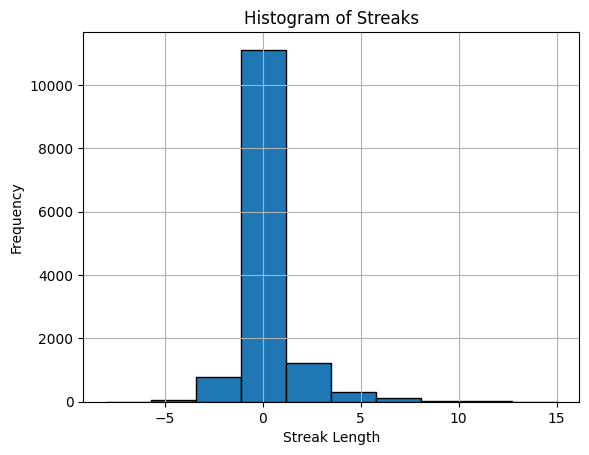

In [42]:
# Combining win streak and lose streak into one column and plotting resulting distribution to determine appropriate scaling
df['streak'] = df['win_streak'] - df['lose_streak']
df['streak'].hist(edgecolor='black')

plt.title('Histogram of Streaks')
plt.xlabel('Streak Length')
plt.ylabel('Frequency')
plt.show()

In [43]:
# Standardizing because distribution is approximately normal
df['streak_standardized'] = (df['streak'] - df['streak'].mean()) / df['streak'].std()

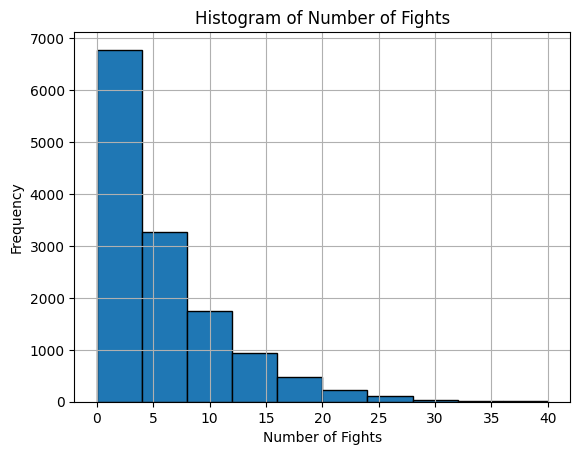

In [44]:
# Plotting number of fights
df['num_fights'].hist(edgecolor='black')

plt.title('Histogram of Number of Fights')
plt.xlabel('Number of Fights')
plt.ylabel('Frequency')
plt.show()

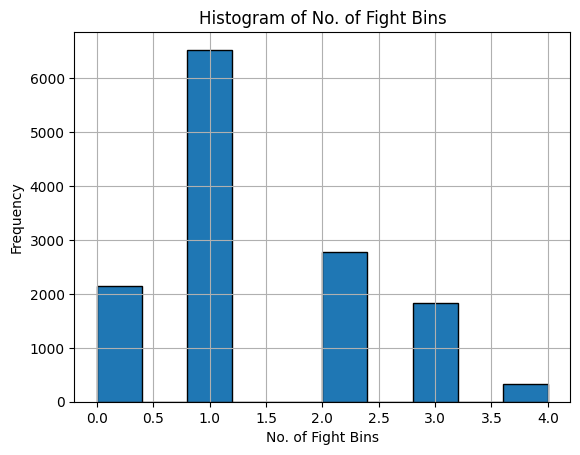

In [45]:
# Separating into bins and label encoding due to strong right skew
df['fight_bins'] = pd.cut(df['num_fights'], bins=[-1, 0, 5, 10, 20, np.inf], labels=[0, 1, 2, 3, 4])
df['fight_bins'].hist(edgecolor='black')

plt.title('Histogram of No. of Fight Bins')
plt.xlabel('No. of Fight Bins')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Calculating the rate of KO losses and KO wins
df['KO_loss_rate'] = list(map(lambda k, l: 0 if l == 0 else k/l, df['KO_losses'], df['losses']))
df['KO_win_rate'] = list(map(lambda k, w: 0 if w == 0 else k/w, df['KO_wins'], df['wins']))
df[df['fighter'] == 'charles oliveira'].iloc[:, [1,3,4,7,38,87,88,91,92,186,185]]

,result,fighter,opponent,round,num_fights,wins,losses,KO_loss,KO_wins,KO_win_rate,KO_loss_rate
2355,1.0,charles oliveira,darren elkins,1,0,0.0,0.0,0,0.0,0.000000,0.000000
2431,1.0,charles oliveira,efrain escudero,3,1,1.0,0.0,0,0.0,0.000000,0.000000
2578,-1.0,charles oliveira,jim miller,1,2,2.0,0.0,0,0.0,0.000000,0.000000
2836,0.0,charles oliveira,nik lentz,2,3,2.0,1.0,0,0.0,0.000000,0.000000
2916,-1.0,charles oliveira,donald cerrone,1,4,2.0,1.0,1,0.0,0.000000,0.000000
3229,1.0,charles oliveira,eric wisely,1,5,2.0,2.0,0,0.0,0.000000,0.500000
3463,1.0,charles oliveira,jonathan brookins,2,6,3.0,2.0,0,0.0,0.000000,0.500000
3656,-1.0,charles oliveira,cub swanson,1,7,4.0,2.0,1,0.0,0.000000,0.500000
4230,-1.0,charles oliveira,frankie edgar,3,8,4.0,3.0,0,0.0,0.000000,0.666667
4737,1.0,charles oliveira,andy ogle,3,9,4.0,4.0,0,0.0,0.000000,0.500000


<h1>Combining Fights into Singular Rows</h1>

<p>Here, I combine the two-row representation of each fight into a one-row representation</p>

In [47]:
df_by_fighter = df.copy()

In [48]:
# Creating all names for new columns
new_cols = [f'{col}_{i}' for i in range(1, 3) for col in df.columns]
new_rows = []

# Combining each pair of columns
for i in range(len(df)):
    if i % 2 == 0:
        row_pair = df.iloc[[i, i+1]].values.flatten()
    else:
        row_pair = df.iloc[[i,i-1]].values.flatten()
    new_rows.append(row_pair)
df = pd.DataFrame(new_rows, columns=new_cols)
df

,date_1,result_1,title_fight_1,fighter_1,opponent_1,division_1,method_1,round_1,time_1,time_format_1,...,clinch_strikes_landed_per_min_standardized_2,clinch_strikes_attempts_per_min_standardized_2,ground_strikes_landed_per_min_standardized_2,ground_strikes_attempts_per_min_standardized_2,time_from_prime_standardized_2,streak_2,streak_standardized_2,fight_bins_2,KO_loss_rate_2,KO_win_rate_2
0,1999-07-16,-1.0,0.0,royce alger,eugene jackson,Middleweight,KO/TKO,2,1:19,5-5-5,...,-0.833806,-0.904965,-0.561532,-0.619762,0.547947,0,-0.154120,0,0.000000,0.000000
1,1999-07-16,1.0,0.0,eugene jackson,royce alger,Middleweight,KO/TKO,2,1:19,5-5-5,...,-0.833806,-0.904965,1.074306,1.846985,NaN,-1,-0.817346,1,0.000000,0.000000
2,1999-07-16,-1.0,0.0,tim lajcik,tsuyoshi kohsaka,Heavyweight,KO/TKO,2,5:00,5-5-5,...,-0.684571,-0.715708,-0.024225,0.142245,-0.578456,0,-0.154120,1,1.000000,0.000000
3,1999-07-16,1.0,0.0,tsuyoshi kohsaka,tim lajcik,Heavyweight,KO/TKO,2,5:00,5-5-5,...,-0.811075,-0.829928,-0.531976,-0.531842,0.435472,0,-0.154120,0,0.000000,0.000000
4,1999-07-16,-1.0,0.0,flavio luiz moura,paul jones,Middleweight,SUB,1,4:20,5-5-5,...,-0.833806,-0.904965,-0.561532,-0.619762,1.368748,0,-0.154120,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13615,2023-04-15,1.0,0.0,azamat murzakanov,dustin jacoby,Light Heavyweight,U-DEC,3,5:00,5-5-5,...,-0.337183,-0.327636,-0.664078,-0.683243,0.845988,-1,-0.817346,2,0.000000,0.500000
13616,2023-04-15,-1.0,0.0,billy quarantillo,edson barboza,Featherweight,KO/TKO,1,2:37,5-5-5,...,-0.604681,-0.668725,-0.291616,-0.307882,2.200092,0,-0.154120,4,0.363636,0.500000
13617,2023-04-15,1.0,0.0,edson barboza,billy quarantillo,Featherweight,KO/TKO,1,2:37,5-5-5,...,1.842204,1.376702,0.935395,0.881990,1.397531,0,-0.154120,2,0.000000,0.600000
13618,2023-04-15,-1.0,0.0,arnold allen,max holloway,Featherweight,U-DEC,5,5:00,5-5-5-5-5,...,0.525148,0.380017,-0.091816,-0.115465,0.565217,0,-0.154120,4,0.000000,0.473684


In [49]:
print_cols_w_indices(df)

0: date_1
1: result_1
2: title_fight_1
3: fighter_1
4: opponent_1
5: division_1
6: method_1
7: round_1
8: time_1
9: time_format_1
10: reach_1
11: age_1
12: height_1
13: knockdowns_1
14: days_since_last_comp_1
15: sub_landed_1
16: sub_attempts_1
17: reversals_1
18: control_1
19: takedowns_landed_1
20: takedowns_attempts_1
21: sig_strikes_landed_1
22: sig_strikes_attempts_1
23: total_strikes_landed_1
24: total_strikes_attempts_1
25: head_strikes_landed_1
26: head_strikes_attempts_1
27: body_strikes_landed_1
28: body_strikes_attempts_1
29: leg_strikes_landed_1
30: leg_strikes_attempts_1
31: distance_strikes_landed_1
32: distance_strikes_attempts_1
33: clinch_strikes_landed_1
34: clinch_strikes_attempts_1
35: ground_strikes_landed_1
36: ground_strikes_attempts_1
37: comp_time_1
38: num_fights_1
39: win_streak_1
40: lose_streak_1
41: win_loss_ratio_1
42: KO_losses_1
43: sub_absorbed_1
44: takedowns_absorbed_1
45: sig_strikes_absorbed_1
46: total_strikes_absorbed_1
47: head_strikes_absorbed_

In [50]:
# Filtering so only relevant columns for EDA are included
rel_columns_1 = [1,2,41,89] + list(range(126,143)) + list(range(144,181)) + list(range(183, 187))
rel_columns_2 = [i + 187 for i in rel_columns_1]
rel_columns = rel_columns_1 + rel_columns_2
df = df.iloc[:, rel_columns]

In [51]:
# Removing all duplicate columns for values that apply to the fight and not the individual fighter
fight_stats = ['title_fight', 'result', 'encoded_division', 'encoded_time_format']
for stat in fight_stats:
    column_name = stat + '_1'
    df = df.rename(columns={column_name: stat}).copy()
    del df[stat + '_2']
df = df.dropna().copy()

In [52]:
# Printing all columns to verify before engaging in EDA
print_cols_w_indices(df)

0: result
1: title_fight
2: win_loss_ratio_1
3: win_rate_1
4: sub_landed_accuracy_1
5: takedowns_landed_accuracy_1
6: sig_strikes_landed_accuracy_1
7: total_strikes_landed_accuracy_1
8: head_strikes_landed_accuracy_1
9: body_strikes_landed_accuracy_1
10: leg_strikes_landed_accuracy_1
11: distance_strikes_landed_accuracy_1
12: clinch_strikes_landed_accuracy_1
13: ground_strikes_landed_accuracy_1
14: stance_Open Stance_1
15: stance_Orthodox_1
16: stance_Sideways_1
17: stance_Southpaw_1
18: stance_Switch_1
19: encoded_division
20: encoded_time_format
21: reach_standardized_1
22: age_standardized_1
23: height_standardized_1
24: days_since_last_comp_standardized_1
25: sub_absorbed_per_min_standardized_1
26: takedowns_absorbed_per_min_standardized_1
27: sig_strikes_absorbed_per_min_standardized_1
28: total_strikes_absorbed_per_min_standardized_1
29: head_strikes_absorbed_per_min_standardized_1
30: body_strikes_absorbed_per_min_standardized_1
31: leg_strikes_absorbed_per_min_standardized_1
32